In [40]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from datetime import date
# brokenaxes package: https://github.com/bendichter/brokenaxes
from brokenaxes import brokenaxes

In [31]:
ecsp = pd.read_csv("datasets/Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv", parse_dates =[14])

In [32]:
# take a first look at it
with pd.option_context('display.max_columns', None): 
    display(ecsp[1:10])

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,Company Type,Current fulltime,Job created,Job retain,Effective Date,Total Savings,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,LMEP,NaN,NaN,NaN,2008-04-02,136578.20,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,LMEP,1238.0,NaN,NaN,2015-01-05,302959.40,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,ECSP,25.0,NaN,NaN,2020-02-03,2159.67,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,LMEP,2699.0,NaN,NaN,2017-06-30,922407.32,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan
5,"120 Wall Street, LLC",Jason McCalla,jmccalla@silvprop.com,2125517391,120 Wall Street,New York,NY,10005,Commercial,Back Offices,LMEP,958.0,NaN,NaN,2015-07-02,368601.17,2090906.36,New York,40.704380,-74.006427,101.0,1.0,7.0,1000871.0,1.000370e+09,Battery Park City-Lower Manhattan
6,"139 ACA Realty, Inc.",Eitan Chandally,barbara@dial7.com,7187076123,43-23 35th Street,Long Island City,NY,11101,Commercial,Limousine Service,ECSP,125.0,NaN,NaN,2008-04-07,1637.29,129401.39,Queens,40.745706,-73.929565,402.0,26.0,179.0,4003160.0,4.002220e+09,Hunters Point-Sunnyside-West Maspeth
7,"141 Lake Avenue Realty c/o JR Produce, Inc.",Josef Raz,jrproduce@gmail.com,7183708782,141 Lake Avenue,Staten Island,NY,10303,Wholesale/Warehouse/Distribution,Dist. of prepacked salads,ECSP,6.0,NaN,NaN,2009-12-08,4380.51,59681.70,Staten Island,40.633153,-74.150999,501.0,49.0,239.0,5146740.0,5.011610e+09,Mariner's Harbor-Arlington-Port Ivory-Granitev...
8,14-10 123rd Street LLC,Danica/Ivan Drazic,ddrazic@atjelectrical.com,7183210117,14-10 123rd Street,College Point,NY,11356,Commercial,Electrical Parts Mfg.,ECSP,35.0,NaN,NaN,2011-03-04,2534.00,28752.48,Queens,40.785144,-73.844833,407.0,19.0,929.0,4098344.0,4.040850e+09,College Point
9,183 Lorriane Street LLC,Tom Sapienza,tsapienza@KLCNY.com,2128405588,183 Lorraine Street,Brooklyn,NY,11231,Wholesale/Warehouse/Distribution,Commercial Storage facility,ECSP,9.0,NaN,NaN,2015-11-06,31483.87,187637.74,Brooklyn,40.673106,-74.002300,306.0,38.0,53.0,3336622.0,3.005720e+09,Carroll Gardens-Columbia Street-Red Hook


In [33]:
# get some basic info about it
ecsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Company Name                               450 non-null    object        
 1   company contact                            450 non-null    object        
 2   company email                              433 non-null    object        
 3   company phone                              450 non-null    object        
 4   Address                                    450 non-null    object        
 5   City                                       450 non-null    object        
 6   State                                      450 non-null    object        
 7   Postcode                                   450 non-null    int64         
 8   Industry                                   450 non-null    object        
 9   Industry descr       

In [34]:
# are duplicate companies just ones with the same company name? 
# what if they have different names but the same contact, address and phone number?
# what if they have the same name but different contact, address and/or phone number?
# for phone numbers that appear more than once, we print out rows grouped by phone number
# to visually check whether company name, company contact, and company address are also the same.
# conclusion: in this dataset, duplicates have the same company name
# but the same contact (with same phone and address) may own multiple businesses
relevant_headers = ["Company Name", "company contact", "company phone", 
                    "Address", "City", "Borough", "State", "Postcode", "Effective Date"]
dup_phones = pd.concat(g for _, g in ecsp.groupby("company phone") if len(g) > 1)
dup_phones[relevant_headers]

,Company Name,company contact,company phone,Address,City,Borough,State,Postcode,Effective Date
171,FRESH DIRECT LLC,JOE LACY,2128222203,23-30 BORDEN AVENUE,Queens,Queens,NY,11101,2010-10-05
172,FRESH DIRECT LLC,JOE LACY,2128222203,23-30 BORDEN AVENUE,Queens,Queens,NY,11101,2017-08-08
9,183 Lorriane Street LLC,Tom Sapienza,2128405588,183 Lorraine Street,Brooklyn,Brooklyn,NY,11231,2015-11-06
400,TI Ozone Park Storage LLC,Tom Sapienza,2128405588,78-10 Liberty Avenue,Ozone Park,Queens,NY,11417,2016-02-02
407,Treasure Asset Storage LLC,Tom Sapienza,2128405588,122 West 146th Street,New York,New York,NY,10039,2018-01-29
223,"JANUS MANAGEMENT, INC.",Ben Weissbourd,2129322388,1361 AMSTERDAM AVENUE,New York,New York,NY,10027,2009-01-09
293,Neighborhood Eigth Avenue LLC,Novak Vukasinovic,2129322388,423-429 W 127th Street,New York,New York,NY,10103,2011-06-09
437,WHBI LLC,Samuel Sia,2129322388,423-427 West 127th Street,New York,New York,NY,10027,2014-11-06
378,"Spin Master, Inc.",Mark Segal,4163646002,30-30 47th Avenue,Lond Island City,Queens,NY,11101,2019-11-04
379,"Spin Master, Inc.",Mark Segal,4163646002,30-30 47th Avenue,Lond Island City,Queens,NY,11101,2020-07-07


In [35]:
unique_company_groups = ecsp.groupby("Company Name")
# dup_names = pd.concat(g for _, g in unique_company_groups if len(g) > 1)
# dup_names[relevant_headers]
print("number of unique companies:", unique_company_groups.ngroups)

number of unique companies: 439


In [36]:
by_borough = ecsp.dropna(subset=["Job created"]).groupby("Borough")
print("jobs created in Queens:")
print(by_borough.get_group("Queens")["Job created"].sum())

jobs created in Queens:
102.0


In [37]:
emails = ecsp[["company email"]].dropna()
# split list of emails into antecedent (part before @) and domain (part after @)
emails[["antecedent", "domain"]] = emails["company email"].str.split('@', expand=True)
print("number of unique email domains: ", emails["domain"].nunique())

number of unique email domains:  356


In [38]:
# get a dataframe of the companies in NTAs where the NTA has >= 5 unique company names
big_ntas = ecsp.groupby("NTA").filter(lambda x: x["Company Name"].nunique() >= 5)

In [39]:
big_ntas_stats=big_ntas.groupby("NTA").agg(
    **{"Average Total Savings":pd.NamedAgg(column="Total Savings", aggfunc="mean"),
    "Total Reported Jobs Created":pd.NamedAgg(column="Job created", aggfunc="sum"),
    "Num Companies":pd.NamedAgg(column="Company Name", aggfunc="size"),
    "Num who Reported Jobs":pd.NamedAgg(column="Job created", aggfunc="count")
    }
)
from pathlib import Path
filepath = "datasets/ECSP_stats.csv"
big_ntas_stats.to_csv(filepath)
#big_ntas_stats


In [41]:
df = pd.read_csv("datasets/ECSP_stats.csv")

In [42]:
df["Fraction who Reported Jobs"] = df["Num who Reported Jobs"]/df["Num Companies"]

In [43]:
jobs_created = df["Total Reported Jobs Created"]
avg_savings = df["Average Total Savings"]
fraction_reporting = df["Fraction who Reported Jobs"]
ntas = df["NTA"]

Text(0.5, 0, 'Reported Jobs Created')

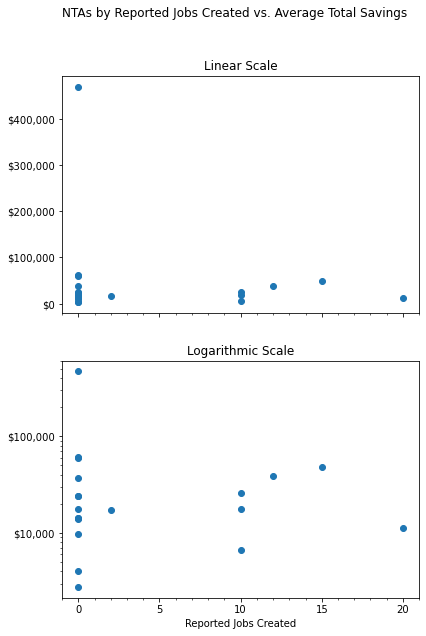

In [44]:
fig1, (lin_scatter, log_scatter) = plt.subplots(2, sharex=True, figsize=[6.4, 9.6])
#title of both plots
fig1.suptitle("NTAs by Reported Jobs Created vs. Average Total Savings")
# put some vertical padding between subplots
lin_scatter.xaxis.set_major_locator(ticker.MultipleLocator(5))
lin_scatter.xaxis.set_minor_locator(ticker.MultipleLocator(1))

lin_scatter.set_title("Linear Scale")
lin_scatter.scatter(jobs_created, avg_savings)

fmt = '${x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
lin_scatter.yaxis.set_major_formatter(tick) 

log_scatter.set_yscale('log')
log_scatter.set_title("Logarithmic Scale")
log_scatter.scatter(jobs_created, avg_savings)
log_scatter.yaxis.set_major_formatter(tick)
log_scatter.set_xlabel("Reported Jobs Created")

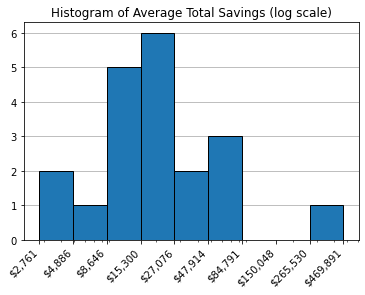

In [45]:
hist = plt.subplot()
hist.set_title("Histogram of Average Total Savings (log scale)")
hist.set_xscale('log')
hist.grid(axis="y")
# we want the bins to be divided up on a logarithmic scale, not linear
logbins = np.geomspace(avg_savings.min(), avg_savings.max(), 10)
hist.hist(avg_savings, bins=logbins, edgecolor='black', zorder=2)
hist.xaxis.set_major_formatter(tick)
hist.set_xticks(logbins.round())


for label in hist.get_xticklabels(which='major'):
    label.set(rotation=45, horizontalalignment='right')


In [46]:
job_creators= ecsp[pd.notna(ecsp["Job created"])]
with pd.option_context('display.max_columns', None): 
    display(job_creators)

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,Company Type,Current fulltime,Job created,Job retain,Effective Date,Total Savings,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
29,"AFC INDUSTRIES, INC.",ANAT ROTLEVI,anrotlevi@afcindustries.com,7187470237,13-16 133RD PLACE,College Point,NY,11356,Manufacturing,MFG. COMPUTER FURNI.,ECSP,41.0,10.0,82.0,2004-03-05,4026.73,34483.56,Queens,40.786469,-73.834527,407.0,19.0,945.0,4445908.0,4.040120e+09,Whitestone
37,ALLE PROCESSING CORP.,Sam HOLLANDER,halbycpa@alleprocessing.com,7188942000,54-58 56TH DR. & 5820-5880 MAURICE,Queens,NY,11378,Manufacturing,MANUFACTURER,ECSP,494.0,60.0,2964.0,2007-06-28,8886.14,3645626.13,Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,"CARNEGIE LINEN SERVICES, INC.",ERIC SCHWEITZER,ericschweitzer@carnegielinen.com,7184022499,874 EAST 139TH STREET,Bronx,NY,10454,Commercial,COMMERCIAL,ECSP,20.0,5.0,20.0,2007-11-06,3057.76,202990.89,Bronx,40.803371,-73.907629,201.0,17.0,19.0,2004038.0,2.025980e+09,Mott Haven-Port Morris
120,DAIRYLAND USA CORP.,Ken Clark,kclark@chefswarehouse.com,7188428700,240 FOOD CENTER DRIVE,Bronx,NY,10474,Wholesale/Warehouse/Distribution,WHLS. FOOD DIST. AND MFG.,ECSP,30.0,12.0,30.0,2005-02-03,181579.24,1132936.57,Bronx,40.810305,-73.873691,202.0,17.0,117.0,2127434.0,2.027700e+09,Hunts Point
137,"DURA FOAM, INC.",ANTHONY FONTANA,ldyjewles@yahoo.com,7188481216,63-02 59TH AVENUE,Queens,NY,11378,Manufacturing,MFG/FABR FOAM & CUSHIONS,ECSP,14.0,10.0,14.0,2006-03-01,52.33,323.11,Queens,40.719695,-73.901421,405.0,30.0,521.0,4437578.0,4.027550e+09,Maspeth
324,"PEPSI COLA BOTTLING CO., OF NY",Gerard Hewitt,shermanr@pepsi-ny.com,7183921018,112-02 15TH AVENUE,College Point,NY,11356,Manufacturing,MANUFACTURER,ECSP,231.0,2.0,462.0,2007-05-02,54127.14,3326530.48,Queens,40.783872,-73.854693,407.0,19.0,929.0,4098135.0,4.040650e+09,College Point
353,"RUGUS REALTY, INC. DBA MISS GRIMBLE",Errol Bier,errol@missgrimble.com,7186652253,909 EAST 135TH STREET,Bronx,NY,10454,Manufacturing,LANDLORD/WHOLSALE,ECSP,5.0,2.0,5.0,2007-04-10,1.85,21780.28,Bronx,40.800542,-73.909345,201.0,17.0,19.0,2094136.0,2.025940e+09,Mott Haven-Port Morris
414,ULTRA CREATIVE CORP.,ROBERT MOREL,NaN,7187865151,957 ESSEX STREET,Brooklyn,NY,11208,Manufacturing,MFG PLASTIC BAGS,ECSP,130.0,15.0,260.0,1993-02-05,10646.47,1242068.09,Brooklyn,40.660676,-73.874955,305.0,42.0,1078.0,NaN,NaN,East New York
432,"WALDORF BAKERY, INC. DBA MAURICE",CRAIG BIER,mrdessert@gmail.com,7186652496,909 EAST 135TH STREET,bronx,NY,10454,Manufacturing,WHOLESALE,ECSP,6.0,3.0,6.0,2007-06-08,18.70,13734.02,Bronx,40.800542,-73.909345,201.0,17.0,19.0,2094136.0,2.025940e+09,Mott Haven-Port Morris
433,"WATER LILIES FOOD, INC.",Peter Lee,peterlee@waterliliesfood.com,7187778899,45-10 19TH AVENUE,Queens,NY,11105,Manufacturing,MANUFACTURER,ECSP,27.0,20.0,54.0,2007-07-02,2056.80,927036.80,Queens,40.776128,-73.896413,401.0,22.0,12301.0,4014854.0,4.007750e+09,Steinway


In [47]:
grouped = job_creators.groupby("Effective Date")
jobs_created_timeseries = grouped["Job created"].sum()
jobs_created_timeseries

Effective Date
1993-02-05    15.0
2004-03-05    10.0
2005-02-03    12.0
2006-03-01    10.0
2007-04-10     2.0
2007-05-02     2.0
2007-06-08     3.0
2007-06-28    60.0
2007-07-02    20.0
2007-11-06     5.0
2008-12-09    10.0
Name: Job created, dtype: float64

In [49]:
jobs_by_month = jobs_created_timeseries.resample('M').sum()
jobs_by_month

Effective Date
1993-02-28    15.0
1993-03-31     0.0
1993-04-30     0.0
1993-05-31     0.0
1993-06-30     0.0
              ... 
2008-08-31     0.0
2008-09-30     0.0
2008-10-31     0.0
2008-11-30     0.0
2008-12-31    10.0
Freq: M, Name: Job created, Length: 191, dtype: float64

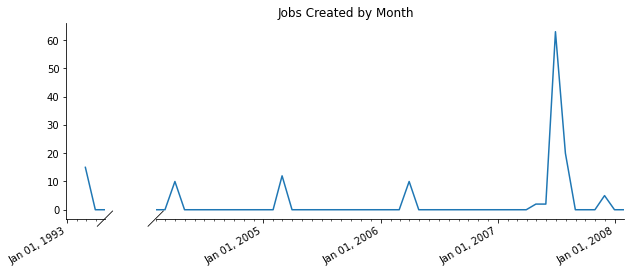

In [50]:
fig = plt.figure(figsize = (10,4))
bax = brokenaxes(
    xlims=(
        (
            datetime.date(1992, 12, 31),
            datetime.date(1993, 4, 30),
        ),
        (
            datetime.date(2004, 1, 31),
            datetime.date(2008, 1, 31),
        )
    )
)


bax.plot(jobs_by_month)
bax.set_title("Jobs Created by Month")
fig.autofmt_xdate()
[x.remove() for x in bax.diag_handles]
bax.draw_diags()
import matplotlib.dates as mdates


for ax in bax.axs:
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))